##WEEK 11 KMEANS CLUSTERING

clustering adalah sebuah proses untuk mengelompokkan data ke dalam beberapa cluster atau kelompok sehingga data dalam satu cluster memiliki tingkat kemiripan yangmaksimum dan data antar cluster memiliki kemiripan yagn minimum

In [ ]:
import pandas as pd # dataframe
import numpy as np # use for working with arrays and maths
from matplotlib import pyplot as plt #plotting
from sklearn.datasets import make_blobs # generate data
from sklearn.cluster import KMeans #main algorithm

import warnings
warnings.filterwarnings('ignore')

#determining number of cluster
from sklearn.metrics import silhouette_score

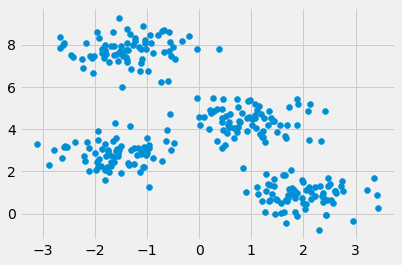

In [ ]:
# load dataset
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1])

In [ ]:
print(X.shape)
print(y.shape)

(300, 2)
(300,)


#3. Determine number of cluster

Elbow Methode

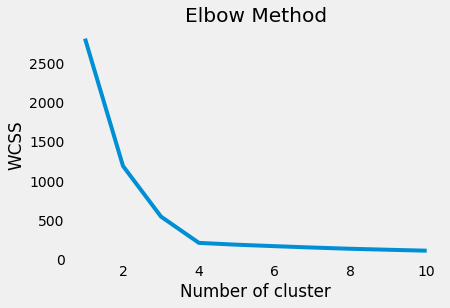

In [ ]:
wcss = []
for i in range (1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)


plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.grid()
plt.show()

silhouette_score

In [ ]:
silhouette_coefficients = []

# bituce your start at 2 clusters for silhouette coefficient

for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  score = silhouette_score(X, kmeans.labels_)
  silhouette_coefficients.append(score)

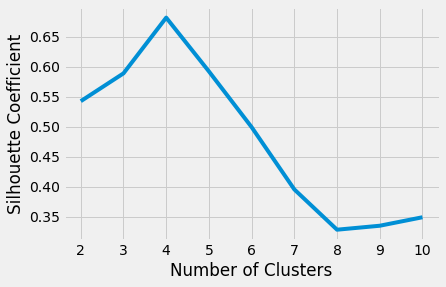

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

# clustering paling optimum adalah 4

CREATE CLUSTER

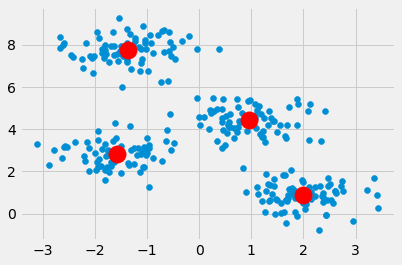

In [ ]:
# menggunakan nilai clustering paling optimum (4)
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='red')
plt.show()

ANOTHER IMPLEMENTATION 

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/kuliah/Smester 5/big data & data mining/p11/Mall_Customers.csv")

#EDA

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


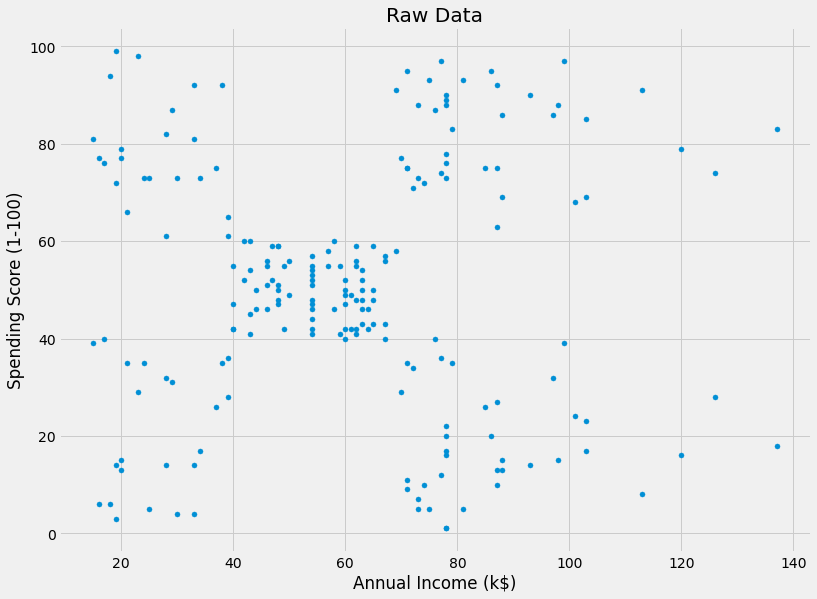

In [ ]:
plt.figure(figsize=(12,9))
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'], s = 25)
plt.title('Raw Data')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [ ]:
X = np.array(df.iloc[:, [3,4]])
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

Determine Number of Clusters

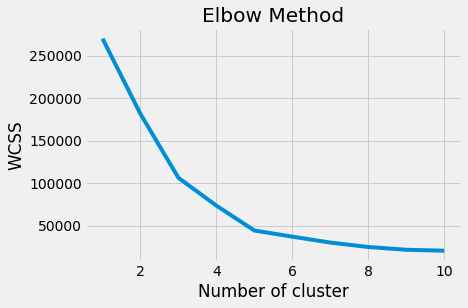

In [ ]:
wcss = []
for i in range (1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)


plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

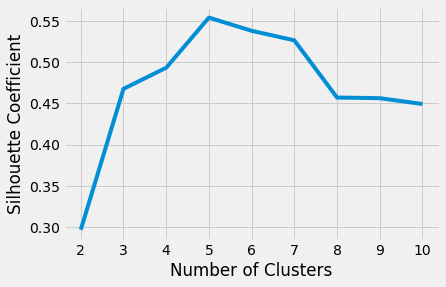

In [ ]:
silhouette_coefficients = []

# bituce your start at 2 clusters for silhouette coefficient

for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  score = silhouette_score(X, kmeans.labels_)
  silhouette_coefficients.append(score)
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

# cluster optimum adalah 5

In [ ]:
# create cluster 
kmeans = KMeans(n_clusters=5, max_iter=500, n_init=10, random_state=0)
kmeans_preds = kmeans.fit_predict(X)
kmeans_preds

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

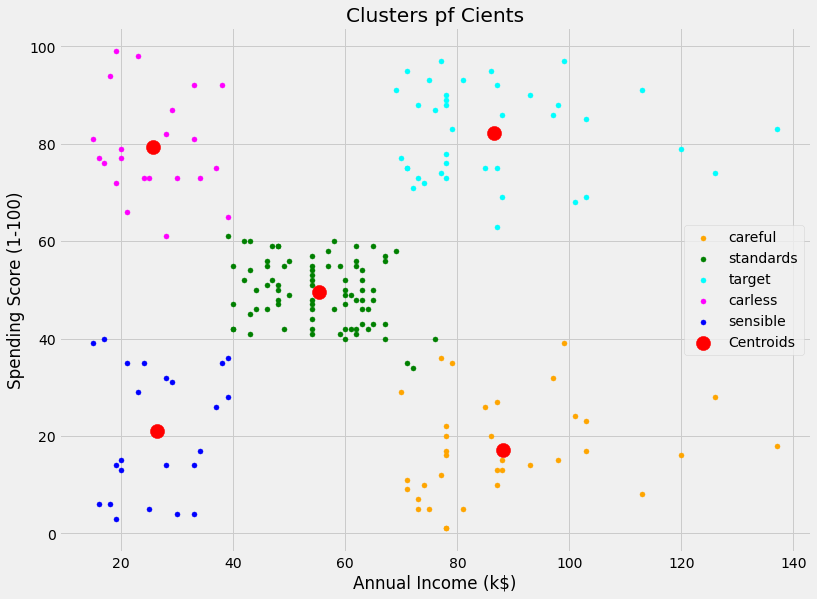

In [ ]:
points_size = 25
colors = ['orange', 'green', 'cyan', 'magenta','blue']
labels = ['careful','standards', 'target', 'carless', 'sensible']

plt.figure(figsize = (12,9))
for i in range(5):
  plt.scatter(X[kmeans_preds == i, 0], X[kmeans_preds == i,1], s = points_size, c = colors[i], label = labels[i])

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 200, c = 'red', label = 'Centroids')

plt.title('Clusters pf Cients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc = 'best')
plt.show()

In [ ]:
df['Cluster'] = kmeans_preds
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [ ]:
df.groupby(['Cluster'])['Cluster'].count()

Cluster
0    35
1    81
2    39
3    22
4    23
Name: Cluster, dtype: int64

In [ ]:
df.loc[df['Cluster'] == 1].head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
43,44,Female,31,39,61,1
46,47,Female,50,40,55,1
47,48,Female,27,40,47,1
48,49,Female,29,40,42,1
49,50,Female,31,40,42,1


In [ ]:
#predict data
print(kmeans([[100,20]]))

TypeError: ignored

In [3]:
import pandas as pd
df1 = pd.read_csv('/content/drive/MyDrive/kuliah/Smester 5/big data & data mining/p12/Mall_Customers.csv')

In [4]:
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
